## Infernece of Continuous variables

Taken from http://www.scipy-lectures.org/packages/statistics/index.html#student-s-t-test-the-simplest-statistical-test

In [5]:
import pandas as pd
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
data.head(10)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [8]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Full Scale Intelligent Quotient (FSIQ)

Verbal Intelligent Quotient (VIQ)

Performance Intelligent Quotient (PIQ)

In [9]:
#groupby: splitting a dataframe on values of categorical variables:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [10]:
#groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


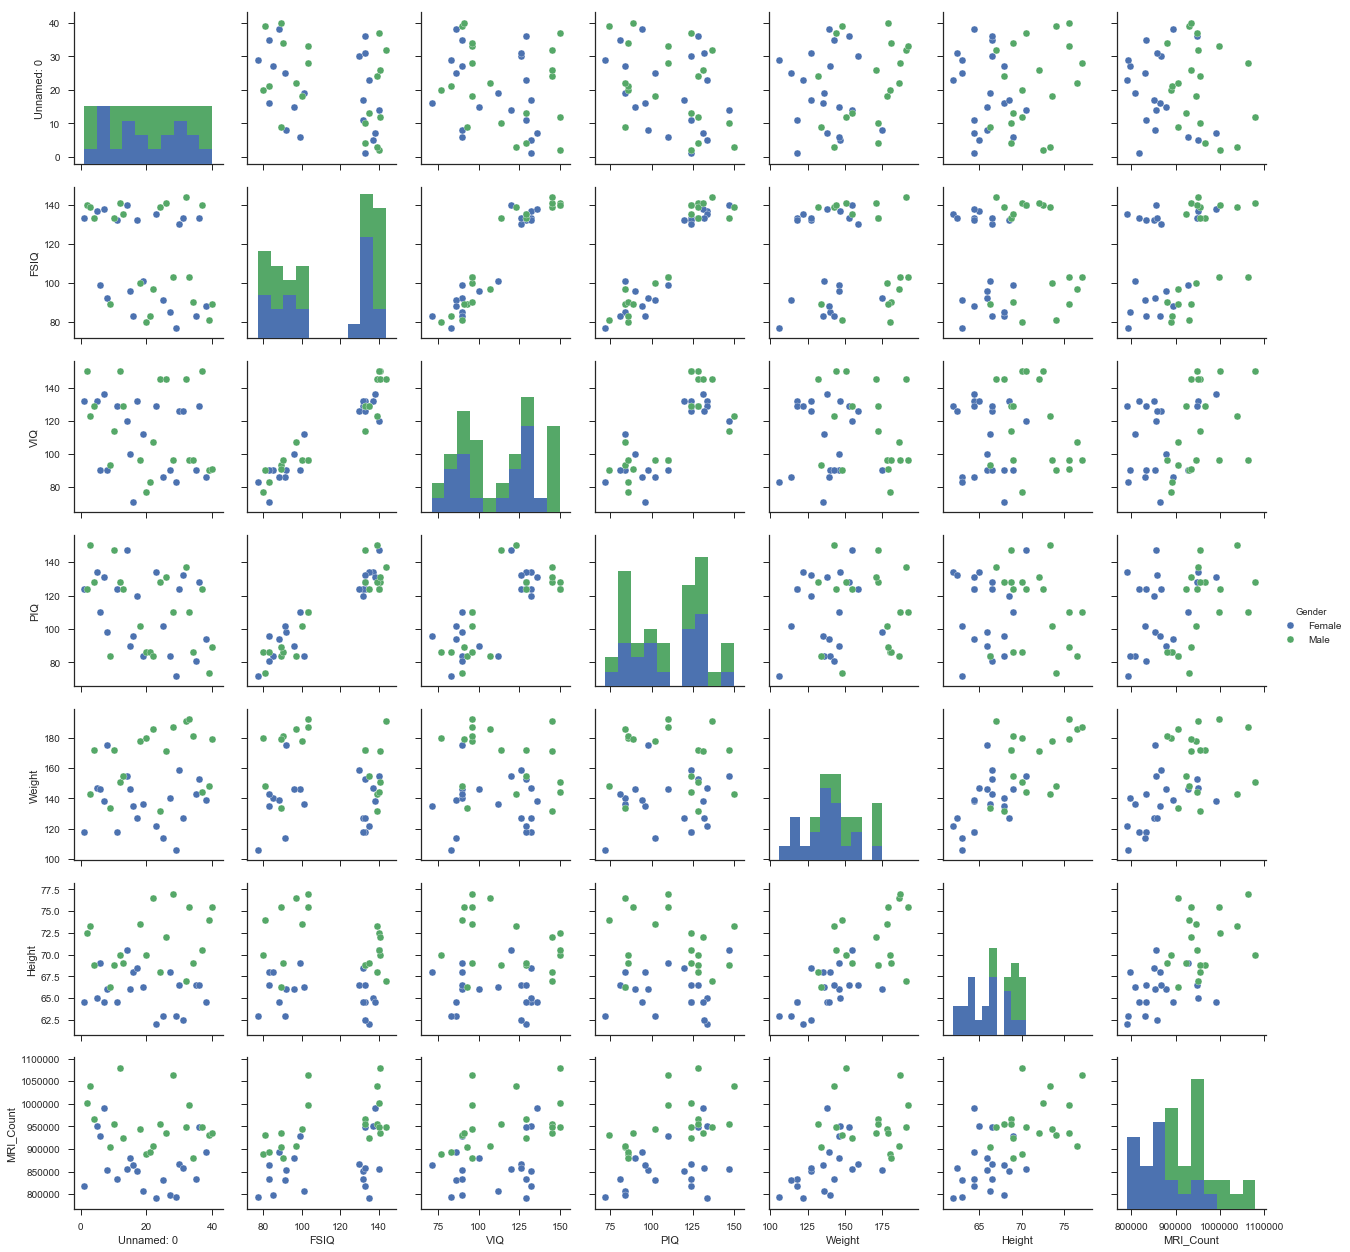

In [47]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(data, hue="Gender")

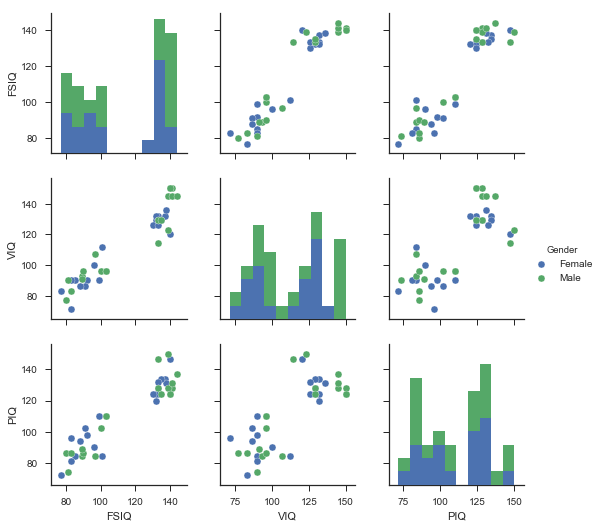

In [61]:
sub_set = data[['FSIQ','VIQ','PIQ','Gender']]
sns.pairplot(sub_set, hue="Gender")

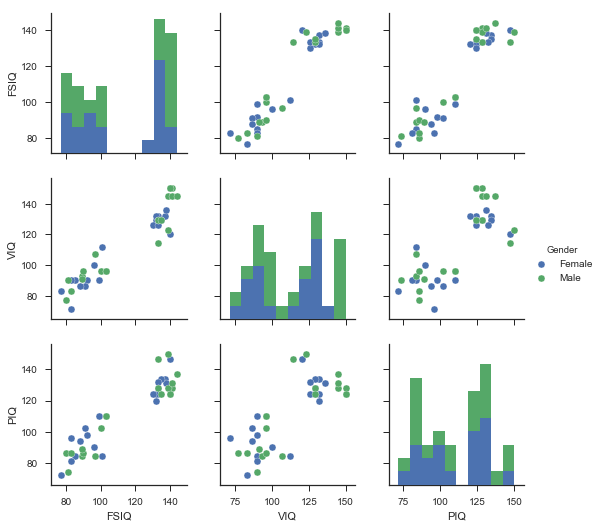

In [62]:
sns.pairplot(data[['FSIQ','VIQ','PIQ','Gender']], hue="Gender")

1-sample t-test: testing the value of a population mean

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value.
This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [24]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

2-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind().
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [25]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

Paired tests: repeated measurements on the same indivuals
    
PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [35]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [36]:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

This is equivalent to a 1-sample test on the difference:

In [37]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)